In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import tensorflow as tf


In [3]:
df=pd.read_csv(r"C:\Users\HP\Downloads\train.csv")

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [6]:
df.iloc[6,1]

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [7]:
df.iloc[6,2:]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: object

In [9]:
# !pip list

In [10]:
x=df['comment_text']

In [11]:
y=df.iloc[:,2:].values


In [12]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [13]:
list(x.values)[0].split()

['Explanation',
 'Why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'Hardcore',
 'Metallica',
 'Fan',
 'were',
 'reverted?',
 'They',
 "weren't",
 'vandalisms,',
 'just',
 'closure',
 'on',
 'some',
 'GAs',
 'after',
 'I',
 'voted',
 'at',
 'New',
 'York',
 'Dolls',
 'FAC.',
 'And',
 'please',
 "don't",
 'remove',
 'the',
 'template',
 'from',
 'the',
 'talk',
 'page',
 'since',
 "I'm",
 'retired',
 'now.89.205.38.27']

In [14]:
len(list(x.values)[0].split())

43

In [15]:
MAX_LENGTH=max(len(sentence.split()) for sentence in list(x.values))+50

In [16]:
MAX_LENGTH

1461

In [17]:
MAX_WORDS=200000

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
tokenizer=Tokenizer(num_words=MAX_WORDS,oov_token="<OOV>")

In [25]:
tokenizer.fit_on_texts(list(x.values))

In [26]:
word_index=tokenizer.word_index

In [27]:
len(word_index)

210338

In [28]:
sequences=tokenizer.texts_to_sequences(list(x.values))

In [29]:
sequences

[[689,
  76,
  2,
  127,
  131,
  178,
  30,
  673,
  4512,
  12053,
  1117,
  87,
  332,
  52,
  2279,
  11449,
  51,
  6865,
  16,
  61,
  2757,
  149,
  8,
  2938,
  35,
  118,
  1222,
  15191,
  2826,
  5,
  46,
  60,
  245,
  2,
  366,
  32,
  2,
  39,
  28,
  144,
  74,
  3463,
  90,
  3086,
  4584,
  2274,
  986],
 [96146,
  53,
  2636,
  14,
  556,
  3810,
  74,
  4557,
  2707,
  22,
  95,
  39,
  804,
  2680,
  993,
  590,
  8378,
  183],
 [413,
  438,
  74,
  135,
  15,
  250,
  3,
  72,
  315,
  79,
  51,
  10,
  14,
  627,
  9,
  2285,
  493,
  503,
  103,
  5,
  612,
  3,
  36,
  326,
  127,
  364,
  4,
  30,
  39,
  28,
  53,
  209,
  3,
  435,
  58,
  37,
  2,
  2395,
  94,
  2,
  738,
  469],
 [58,
  8,
  229,
  98,
  55,
  329,
  1437,
  16,
  2134,
  8,
  6025,
  23,
  2,
  124,
  2503,
  57,
  17,
  514,
  16,
  26,
  6,
  4237,
  4,
  1328,
  4,
  9763,
  8,
  68,
  2,
  278,
  86,
  123,
  13504,
  38,
  10,
  52,
  20,
  43,
  11,
  2,
  1461,
  139,
  1258,
  215

In [30]:
padded_seq=pad_sequences(sequences,maxlen=1800,padding="post")

In [31]:
padded_seq.shape

(159571, 1800)

In [32]:
padded_seq

array([[  689,    76,     2, ...,     0,     0,     0],
       [96146,    53,  2636, ...,     0,     0,     0],
       [  413,   438,    74, ...,     0,     0,     0],
       ...,
       [34279,  7331,  5209, ...,     0,     0,     0],
       [    5,    12,   575, ...,     0,     0,     0],
       [    5,     8,   135, ...,     0,     0,     0]])

# MCSHBAP 
## map,cache,shuffle,batch,prefetch

In [33]:
dataset=tf.data.Dataset.from_tensor_slices((padded_seq,y))
dataset=dataset.cache()
dataset=dataset.shuffle(1600000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [34]:
Batch_X,Batch_y=dataset.as_numpy_iterator().next()

In [35]:
Batch_X

array([[   84,   122,     5, ...,     0,     0,     0],
       [  338,     8,    68, ...,     0,     0,     0],
       [22915, 22915,  1825, ...,     0,     0,     0],
       ...,
       [   11,   794,     8, ...,     0,     0,     0],
       [  251,  1841,    26, ...,     0,     0,     0],
       [39305,  7894,     2, ...,     0,     0,     0]])

In [36]:
len(dataset)

9974

In [37]:
train = dataset.take(int(len(dataset)*0.7))
val = dataset.skip(int(len(dataset)*0.7)).take(int(len(dataset)*0.2))
test = dataset.skip(int(len(dataset)*0.7)).take(int(len(dataset)*0.1))

In [38]:
len(train)

6981

In [39]:
train_generator=train.as_numpy_iterator()

In [40]:
train_generator.next()

(array([[   162,      7,     20, ...,      0,      0,      0],
        [    47,  11829,    438, ...,      0,      0,      0],
        [    46,    151,     23, ...,      0,      0,      0],
        ...,
        [   211,     10, 112059, ...,      0,      0,      0],
        [    18,      6,   1999, ...,      0,      0,      0],
        [    95,     13,     21, ...,      0,      0,      0]]),
 array([[1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Bidirectional,LSTM,Dropout,Embedding

In [42]:
model=Sequential()
model.add(Embedding(MAX_WORDS+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [44]:
model.compile(loss='BinaryCrossentropy',optimizer='adam')

In [45]:
history=model.fit(train,epochs=10,validation_data=val)

Epoch 1/10
6981/6981 [==============================] - 1546s 220ms/step - loss: 0.0625 - val_loss: 0.0480
Epoch 2/10
6981/6981 [==============================] - 1339s 192ms/step - loss: 0.0448 - val_loss: 0.0397
Epoch 3/10
6981/6981 [==============================] - 1364s 195ms/step - loss: 0.0394 - val_loss: 0.0345
Epoch 4/10
6981/6981 [==============================] - 1464s 210ms/step - loss: 0.0352 - val_loss: 0.0312
Epoch 5/10
6981/6981 [==============================] - 1449s 208ms/step - loss: 0.0315 - val_loss: 0.0271
Epoch 6/10
6981/6981 [==============================] - 1292s 185ms/step - loss: 0.0281 - val_loss: 0.0241
Epoch 7/10
6981/6981 [==============================] - 1316s 188ms/step - loss: 0.0251 - val_loss: 0.0217
Epoch 8/10
6981/6981 [==============================] - 1362s 195ms/step - loss: 0.0226 - val_loss: 0.0197
Epoch 9/10
6981/6981 [==============================] - 1466s 210ms/step - loss: 0.0203 - val_loss: 0.0170
Epoch 10/10
6981/6981 [==============

<Figure size 800x500 with 0 Axes>

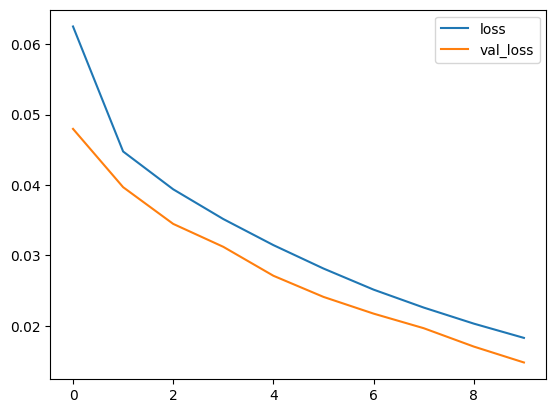

In [46]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [54]:
# model.save('comment_toxicity.h5')

In [50]:
input_text=tokenizer.texts_to_sequences(["You freeking suck!"])

In [52]:
input_text=pad_sequences(input_text,maxlen=1800,padding="post")

In [55]:
res=model.predict(input_text)

1/1 [==============================] - 1s 1s/step


In [56]:
res

array([[9.9955684e-01, 1.7105838e-02, 9.9342877e-01, 2.2051213e-04,
        9.7509503e-01, 1.8396351e-03]], dtype=float32)

In [58]:
batch_x,batch_y=test.as_numpy_iterator().next()

In [64]:
batch_x

array([[126376,   2355,   1878, ...,      0,      0,      0],
       [  2362,     56,    153, ...,      0,      0,      0],
       [   304,  15614,    360, ...,      0,      0,      0],
       ...,
       [   275,     16,   2362, ...,      0,      0,      0],
       [   149,    386,      2, ...,      0,      0,      0],
       [    34,    391,    631, ...,      0,      0,      0]])

In [67]:
(model.predict(batch_x)>0.5).astype(int)

1/1 [==============================] - 0s 156ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [71]:
batch_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy

In [70]:
pre=Precision()
rec=Recall()
cat=CategoricalAccuracy()

In [72]:
for batch in test.as_numpy_iterator():
    X_true,y_true=batch
    y_hat=model.predict(X_true)
    y_true=y_true.flatten()
    y_hat=y_hat.flatten()
    pre.update_state(y_true,y_hat)
    rec.update_state(y_true,y_hat)    
    cat.update_state(y_true,y_hat)

1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 149ms/step


1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 104ms/step


In [76]:
print(f"precision={pre.result().numpy()},recall={rec.result().numpy()},cat_accuracy={cat.result().numpy()}")

precision=0.9201045632362366,recall=0.9260233640670776,cat_accuracy=0.5015045404434204
